LSTM(Long Short-Term Memory)은 순환 신경망(RNN)의 한 종류로, 시계열 데이터나 자연어 처리 등의 시퀀스 데이터를 처리하는 데 사용됩니다. LSTM은 시퀀스 데이터의 장기 의존성을 효과적으로 학습할 수 있는 능력으로 유명합니다. 이를 통해 주식 가격 예측과 같은 시계열 데이터를 처리하는 데 매우 효과적입니다.

LSTM 모델은 다음과 같은 주요 구성 요소로 이루어져 있습니다:

- **입력 게이트(Input Gate)**: 현재 입력 값을 얼마나 유지할지를 결정하는 게이트입니다. 이전 타임 스텝의 은닉 상태와 현재 입력 값을 고려하여 어떤 정보를 저장할지를 결정합니다.
  
- **망각 게이트(Forget Gate)**: 이전 메모리 상태에서 어떤 정보를 잊을지를 결정하는 게이트입니다. 이전 메모리 상태와 현재 입력 값을 고려하여 어떤 정보를 잊을지를 결정합니다.
  
- **셀 상태(Cell State)**: LSTM의 핵심 메모리로서, 현재 상태의 메모리 값을 유지하고 전달합니다. 입력 게이트와 망각 게이트에 의해 업데이트되며, 이전 상태와 현재 입력을 고려하여 새로운 상태를 생성합니다.
  
- **출력 게이트(Output Gate)**: 현재 상태의 셀 상태를 얼마나 출력할지를 결정하는 게이트입니다. 현재 상태의 메모리 값을 기반으로 출력을 생성합니다.

LSTM 모델은 이러한 구성 요소들로 구성되어 있으며, 이를 통해 시계열 데이터의 장기적인 의존성을 학습할 수 있습니다. 주식 가격 예측을 위한 LSTM 모델은 시계열 데이터를 입력으로 받아 다음 시점의 주가를 예측하는 데 사용됩니다. 모델을 학습할 때는 입력 데이터와 실제 주가 데이터를 사용하여 손실을 최소화하도록 학습됩니다. 학습된 모델을 사용하여 새로운 입력 데이터에 대한 예측을 생성하고, 이를 시각화하여 예상 주가를 확인할 수 있습니다.


## 주가 데이터 가져오기

- 한국 거래소(KRX)에서 주식 데이터를 가져오기 위해 'pykrx' 라이브러리를 사용합니다. 예를 들어 삼성전자의 주가 데이터를 가져오려면 다음과 같이 합니다.


In [2]:
from pykrx import stock
df = stock.get_market_ohlcv_by_date("20230101", "20240306", "005930")


In [3]:
df

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2023-01-02,55500,56100,55200,55500,10031448,0.361664
2023-01-03,55400,56000,54500,55400,13547030,-0.180180
2023-01-04,55700,58000,55600,57800,20188071,4.332130
2023-01-05,58200,58800,57600,58200,15682826,0.692042
2023-01-06,58300,59400,57900,59000,17334989,1.374570
...,...,...,...,...,...,...
2024-02-28,72900,73900,72800,73200,11795859,0.411523
2024-02-29,72600,73400,72000,73400,21176403,0.273224
2024-03-04,74300,75000,74000,74900,23210474,2.043597


## 데이터 전처리 및 모델 구성

- 가져온 데이터를 전처리하고 LSTM 모델을 구성합니다. 주가 데이터를 정규화하고 시퀀스 데이터로 변환합니다.

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 및 테스트 데이터 정의
train_size = int(len(df) * 0.8)  # 전체 데이터 중 80%를 학습 데이터로 사용
train_data = df['종가'][:train_size].values
test_data = df['종가'][train_size:].values

# 데이터 정규화
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data.reshape(-1,1))
test_data_normalized = scaler.transform(test_data.reshape(-1,1))

# 시퀀스 데이터 생성 함수
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

# 시퀀스 데이터 생성
seq_length = 20
train_sequences = create_sequences(train_data_normalized, seq_length)
test_sequences = create_sequences(test_data_normalized, seq_length)


In [81]:
train_data

array([55500, 55400, 57800, 58200, 59000, 60700, 60400, 60500, 60500,
       60800, 61100, 61000, 60400, 61500, 61800, 63400, 63900, 64600,
       63300, 61000, 61800, 63500, 63800, 61600, 61900, 63100, 63000,
       62800, 62900, 63200, 62200, 63700, 62600, 62700, 62100, 61100,
       62000, 61300, 60500, 60600, 60800, 60500, 61500, 60700, 60300,
       60100, 59500, 60000, 59000, 59800, 59900, 61300, 60200, 60300,
       61100, 62300, 63000, 62100, 62900, 62700, 63200, 64000, 63100,
       63600, 63900, 62300, 65000, 65700, 65900, 66000, 66100, 65100,
       65300, 65600, 65500, 65300, 65700, 65200, 63600, 64100, 64600,
       65500, 65700, 65400, 65100, 65900, 65300, 64600, 64200, 64100,
       64500, 65400, 65000, 66200, 68400, 68500, 68400, 68500, 68800,
       70300, 72300, 71400, 70900, 72200, 71700, 71000, 70900, 72000,
       71000, 72000, 71900, 71500, 71800, 71200, 71400, 70500, 71300,
       71600, 72400, 72600, 72700, 72400, 72200, 73000, 73000, 72000,
       71600, 69900,

In [87]:
test_data_normalized
len(train_data_normalized)

231

## LSTM 모델 구성 및 학습

- LSTM 모델을 생성하고 데이터를 사용하여 모델을 학습합니다.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(units=100, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),  # 20%의 Dropout 추가
    LSTM(units=100, activation='relu'),
    Dropout(0.2),  # 20%의 Dropout 추가
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences, train_data[seq_length:], epochs=2000, batch_size=32)


Epoch 1/2000


c:\Users\ii672\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4579825664.0000
Epoch 2/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4598175744.0000
Epoch 3/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4610798592.0000 
Epoch 4/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3962345984.0000 
Epoch 5/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4892680704.0000  
Epoch 6/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3321155328.0000
Epoch 7/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3496803840.0000 
Epoch 8/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2364241152.0000
Epoch 9/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1403139712.0000
Epoch 10/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1255263744.0000
Epoch 11/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1019631360.0000
Epoch 12/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 933452544.0000
Epoch 13/2000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 840073600.0000
Epoch 14/2000
7/7 ━━━━━━━━━━━━━━━━━━━━

## 예측 및 시각화
- 모델을 사용하여 주가르 예측하고 결과를 시각화합니다.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


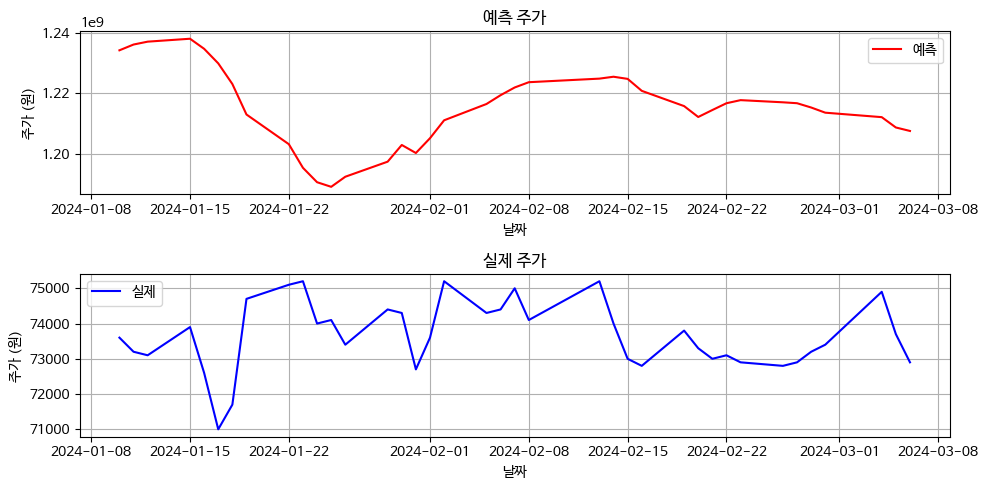

In [6]:
import matplotlib.pyplot as plt

# 테스트 데이터에 대한 예측 수행
predictions = model.predict(test_sequences)

# 예측값을 정규화된 형태에서 원래의 주가 단위로 변환
predictions_denormalized = scaler.inverse_transform(predictions)

# 실제 주가 데이터 가져오기
actual_prices = df['종가'].values[train_size+seq_length:]

# 시각화
plt.figure(figsize=(10, 5))

# 예측 주가 그래프
plt.subplot(2, 1, 1)
plt.plot(df.index[-len(predictions_denormalized):], predictions_denormalized, label='예측', color='red')
plt.title('예측 주가')
plt.xlabel('날짜')
plt.ylabel('주가 (원)')
plt.legend()
plt.grid(True)

# 실제 주가 그래프
plt.subplot(2, 1, 2)
plt.plot(df.index[-len(actual_prices):], actual_prices, label='실제', color='blue')
plt.title('실제 주가')
plt.xlabel('날짜')
plt.ylabel('주가 (원)')
plt.legend()
plt.grid(True)

plt.tight_layout()  # 그래프 간격 조정
plt.show()




In [89]:
actual_prices

array([73600, 73200, 73100, 73900, 72600, 71000, 71700, 74700, 75100,
       75200, 74000, 74100, 73400, 74400, 74300, 72700, 73600, 75200,
       74300, 74400, 75000, 74100, 75200, 74000, 73000, 72800, 73800,
       73300, 73000, 73100, 72900, 72800, 72900, 73200, 73400, 74900,
       73700, 72900])

In [88]:
predictions_denormalized

array([[1.3546356e+09],
       [1.3593307e+09],
       [1.3671663e+09],
       [1.3778066e+09],
       [1.3850104e+09],
       [1.3913228e+09],
       [1.3942125e+09],
       [1.3903345e+09],
       [1.4002175e+09],
       [1.3956219e+09],
       [1.4037372e+09],
       [1.4060261e+09],
       [1.4302822e+09],
       [1.4361981e+09],
       [1.4622788e+09],
       [1.3936214e+09],
       [1.3802445e+09],
       [1.3813228e+09],
       [1.3856169e+09],
       [1.3505043e+09],
       [1.3422266e+09],
       [1.3459398e+09],
       [1.3500508e+09],
       [1.3561448e+09],
       [1.3627034e+09],
       [1.3634999e+09],
       [1.3514355e+09],
       [1.3550260e+09],
       [1.3649386e+09],
       [1.3708831e+09],
       [1.3505949e+09],
       [1.3533499e+09],
       [1.3523476e+09],
       [1.3594688e+09],
       [1.3591410e+09],
       [1.3532237e+09],
       [1.3450941e+09],
       [1.3663840e+09]], dtype=float32)

In [74]:
predictions

array([[3.1264641],
       [3.1259007],
       [3.1252992],
       [3.1247032],
       [3.1241853],
       [3.1237783],
       [3.1237078],
       [3.1237333]], dtype=float32)